In [1]:
from google.colab import files
uploaded = files.upload()

Saving Chennai houseing sale.csv to Chennai houseing sale (1).csv


(7109, 22)
object     10
int64       6
float64     6
Name: count, dtype: int64
   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

 

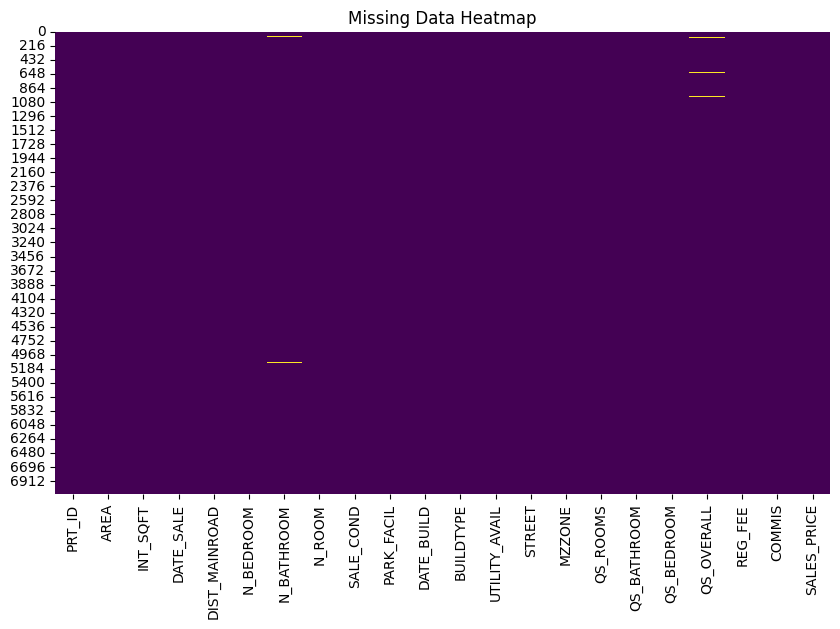

          INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2

KeyError: 'SalePrice'

<Figure size 1000x600 with 0 Axes>

In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning preprocessing tools
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.impute import SimpleImputer

# Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')
# Change the filename as needed

# Basic Information
print(df.shape)
print(df.dtypes.value_counts())
print(df.head())

# Missing Values Summary
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

# Visualizing Missing Data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Descriptive Stats for Numerical Features
print(df.describe())

# Histogram of SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title("Sale Price Distribution")
plt.show()

# Log Transformation to handle skew
df['SalePrice'] = np.log1p(df['SalePrice'])

# Correlation Matrix
plt.figure(figsize=(12,10))
correlation = df.corr()
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True)
plt.title("Feature Correlation with SalePrice")
plt.show()

# Scatter plot: GrLivArea vs SalePrice
plt.figure(figsize=(8,6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Boxplot for categorical variable vs target
plt.figure(figsize=(12,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Overall Quality vs SalePrice")
plt.show()

# Handling Categorical Data - Label Encoding for simplicity
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].fillna('Missing')
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Handling Numerical Missing Values
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Outlier Removal using Z-score
z = np.abs(stats.zscore(df[numeric_cols]))
df_clean = df[(z < 3).all(axis=1)]

print("Data shape after outlier removal:", df_clean.shape)


In [13]:
# 📦 Import Libraries
import pandas as pd

# 📂 Load the Dataset
df = pd.read_csv('Chennai houseing sale.csv')
# Replace with your file name

# 🔍 Check for Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Missing Values in Dataset:\n")
print(missing_values)

# 📊 Optional: Show missing value percentages
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\nMissing Values Percentage:\n")
print(missing_percent)

# 🔁 Check for Duplicate Rows
duplicate_rows = df.duplicated().sum()

print(f"\nNumber of duplicate rows: {duplicate_rows}")

# 🧹 Optionally Remove Duplicates
df = df.drop_duplicates()

print(f"New dataset shape after removing duplicates: {df.shape}")


Missing Values in Dataset:

QS_OVERALL    48
N_BATHROOM     5
N_BEDROOM      1
dtype: int64

Missing Values Percentage:

QS_OVERALL    0.675200
N_BATHROOM    0.070333
N_BEDROOM     0.014067
dtype: float64

Number of duplicate rows: 0
New dataset shape after removing duplicates: (7109, 22)


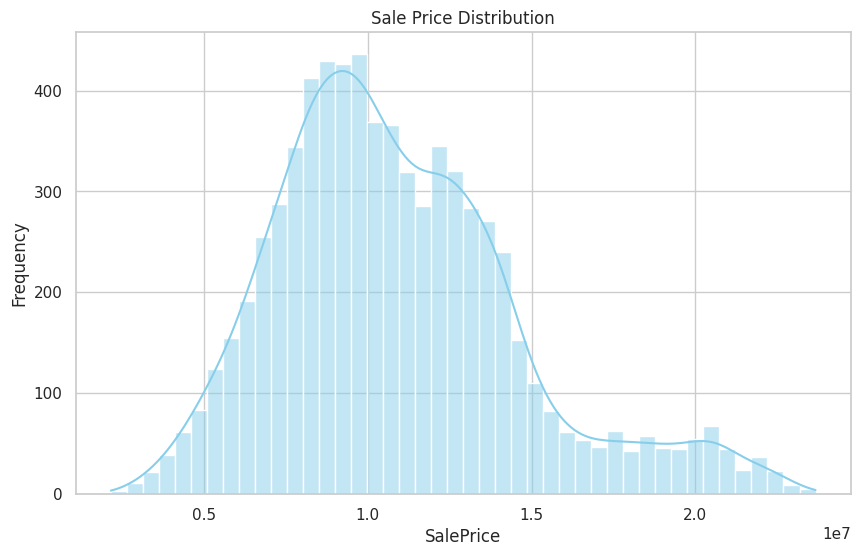

In [18]:
# 📦 Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your filename

# Set plot style
sns.set(style="whitegrid")

# =======================
# 📈 1. SalePrice Distribution
# =======================
plt.figure(figsize=(10,6))

# Check if 'SALES_PRICE' is the correct column name
# If not, replace it with the actual column name from your DataFrame
sns.histplot(df['SALES_PRICE'], kde=True, color='skyblue')
plt.title("Sale Price Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# ... (Rest of your plotting code remains the same)

In [20]:
# 📦 Import Libraries
import pandas as pd

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual file name

# 🎯 Define Target Variable
target = 'SalePrice'

# 📌 Define Feature Set (initial)
# Remove the target and non-informative columns like 'Id'
features = df.drop(columns=[target, 'Id'], errors='ignore').columns.tolist()

# 🧹 Optional: Remove features with high missing values or low variance (basic check)
missing_percent = df[features].isnull().mean()
low_missing_features = missing_percent[missing_percent < 0.2].index.tolist()  # keep features with < 20% missing

# Filter features to those with low missing values
features = [f for f in features if f in low_missing_features]

print(f"Target Variable: {target}")
print(f"\nNumber of Selected Features: {len(features)}")
print(f"\nSelected Features Preview:\n{features[:10]}")  # Show first 10 features


Target Variable: SalePrice

Number of Selected Features: 22

Selected Features Preview:
['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL']


In [23]:
# 📦 Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 📂 Load your dataset
df = pd.read_csv('Chennai houseing sale.csv')

# 🎯 Drop non-informative column (if exists)
df.drop(columns=['Id'], inplace=True, errors='ignore')

# 🎯 Target variable - Update to the correct column name
target = 'SALES_PRICE' # Changed from 'SalePrice' to 'SALES_PRICE'

# 🚩 Separate features and target
X = df.drop(columns=[target])
y = df[target]

# 🔍 Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {categorical_cols}")

# 🧠 One-Hot Encoding (Nominal features)
X_encoded = pd.get_dummies(X, drop_first=True)  # Avoid multicollinearity with drop_first=True

# Combine with target if needed
df_encoded = X_encoded.copy()
df_encoded[target] = y

print(f"\nData shape after encoding: {df_encoded.shape}")
print(df_encoded.head())

Categorical Columns: ['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

Data shape after encoding: (7109, 15767)
   INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131        1.0         1.0       3       4.0   
1      1986             26        2.0         1.0       5       4.9   
2       909             70        1.0         1.0       3       4.1   
3      1855             14        3.0         2.0       5       4.7   
4      1226             84        1.0         1.0       3       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  ...  STREET_No Access  \
0          3.9         4.9       4.330   380000  ...             False   
1          4.2         2.5       3.765   760122  ...             False   
2          3.8         2.2       3.090   421094  ...             False   
3          3.9         3.6       4.010   356321  ...             False   
4          2.5   

In [26]:
# 📦 Import Libraries
import pandas as pd

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual file name

# 🎯 Target Variable
target = 'SALES_PRICE'  # Change to the correct column name for sales price

# 🏠 Separate Features and Target
X = df.drop(columns=[target])
# Features
y = df[target]  # Target

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Columns: {categorical_cols}")

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data if needed (impute missing values, for example, with the mean or mode)
X_encoded = X_encoded.fillna(X_encoded.mean())

# Combine with Target (for analysis or checking)
df_encoded = X_encoded.copy()
df_encoded[target] = y

# Check the shape after One-Hot Encoding
print(f"\nData shape after encoding: {df_encoded.shape}")
print(df_encoded.head())

# 🎯 Optional: Save the encoded dataset
df_encoded.to_csv('encoded_train.csv', index=False)

Categorical Columns: ['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']

Data shape after encoding: (7109, 15767)
   INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  QS_ROOMS  \
0      1004            131        1.0         1.0       3       4.0   
1      1986             26        2.0         1.0       5       4.9   
2       909             70        1.0         1.0       3       4.1   
3      1855             14        3.0         2.0       5       4.7   
4      1226             84        1.0         1.0       3       3.0   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  ...  STREET_No Access  \
0          3.9         4.9       4.330   380000  ...             False   
1          4.2         2.5       3.765   760122  ...             False   
2          3.8         2.2       3.090   421094  ...             False   
3          3.9         3.6       4.010   356321  ...             False   
4          2.5   

In [28]:
# 📦 Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your file name

# 🎯 Target Variable
target = 'SALES_PRICE'  # Changed to 'SALES_PRICE'

# 🏠 Separate Features and Target
X = df.drop(columns=[target])# Features
y = df[target]  # Target

# 🔍 Identify Numerical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical Columns: {numerical_cols}")

# 🧹 Handle Missing Data (for numerical features)
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].mean())

# 🔧 Feature Scaling - Standardization (Z-score scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Convert scaled features back to DataFrame with original column names
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

# Combine scaled features with non-numeric features (if any) for a complete dataset
X_final = pd.concat([X_scaled_df, X.drop(columns=numerical_cols)], axis=1)

# Check the shape of the final dataset
print(f"\nScaled Data Shape: {X_final.shape}")
print(X_final.head())

# 🎯 Optional: Save the scaled dataset for later use
X_final.to_csv('scaled_train.csv', index=False)

Numerical Columns: ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS']

Scaled Data Shape: (7109, 21)
   INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  QS_ROOMS  \
0 -0.826608       0.546992  -0.793520   -0.520825 -0.675845  0.541007   
1  1.320409      -1.282306   0.452138   -0.520825  1.286811  1.550078   
2 -1.034314      -0.515743  -0.793520   -0.520825 -0.675845  0.653126   
3  1.033994      -1.491369   1.697796    1.921381  1.286811  1.325840   
4 -0.341234      -0.271837  -0.793520   -0.520825 -0.675845 -0.580183   

   QS_BATHROOM  QS_BEDROOM  QS_OVERALL   REG_FEE  ...  PRT_ID        AREA  \
0     0.437479    1.594560    1.573547  0.021401  ...  P03210  Karapakkam   
1     0.771640   -1.110568    0.498182  2.678471  ...  P09411  Anna Nagar   
2     0.326092   -1.448709   -0.786547  0.308650  ...  P01812       Adyar   
3     0.437479    0.129282    0.964491 -0.144116  ...  P0534

In [36]:
# 📦 Import Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your file name

# 🎯 Target Variable
target = 'SALES_PRICE' # Changed from 'SalePrice' to 'SALES_PRICE'

# 🏠 Separate Features and Target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization) - StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ===========================
# 🔑 Train-Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
# Model 1: Linear Regression
# ===========================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate Model
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression - MSE: {mse_lin_reg:.2f}, R^2: {r2_lin_reg:.2f}")

# ===========================
# Model 2: Ridge Regression
# ===========================
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg.fit(X_train, y_train)

# Predict on test set
y_pred_ridge_reg = ridge_reg.predict(X_test)

# Evaluate Model
mse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)

print(f"Ridge Regression - MSE: {mse_ridge_reg:.2f}, R^2: {r2_ridge_reg:.2f}")

# ===========================
# Model 3: Lasso Regression
# ===========================
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lasso_reg = lasso_reg.predict(X_test)

# Evaluate Model
mse_lasso_reg = mean_squared_error(y_test, y_pred_lasso_reg)
r2_lasso_reg = r2_score(y_test, y_pred_lasso_reg)

print(f"Lasso Regression - MSE: {mse_lasso_reg:.2f}, R^2: {r2_lasso_reg:.2f}")

# ===========================
# Model 4: XGBoost Regression
# ===========================
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Predict on test set
y_pred_xg_reg = xg_reg.predict(X_test)

# Evaluate Model
mse_xg_reg = mean_squared_error(y_test, y_pred_xg_reg)
r2_xg_reg = r2_score(y_test, y_pred_xg_reg)

print(f"XGBoost Regression - MSE: {mse_xg_reg:.2f}, R^2: {r2_xg_reg:.2f}")

Linear Regression - MSE: 3509638520434.08, R^2: 0.73
Ridge Regression - MSE: 3509825733865.60, R^2: 0.73
Lasso Regression - MSE: 5077519526235.63, R^2: 0.61
XGBoost Regression - MSE: 219622211584.00, R^2: 0.98


In [37]:
# 📦 Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your file name

# 🎯 Target Variable
target = 'SalePrice'

# 🏠 Separate Features and Target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization) - StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ===========================
# 🔑 Train-Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
# Model 1: Linear Regression
# ===========================
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate Model
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg, squared=False)
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression - MSE: {mse_lin_reg:.2f}, RMSE: {rmse_lin_reg:.2f}, MAE: {mae_lin_reg:.2f}, R^2: {r2_lin_reg:.2f}")

# ===========================
# Model 2: Ridge Regression
# ===========================
ridge_reg = Ridge(alpha=1.0)  # alpha is the regularization parameter
ridge_reg.fit(X_train, y_train)

# Predict on test set
y_pred_ridge_reg = ridge_reg.predict(X_test)

# Evaluate Model
mse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg)
rmse_ridge_reg = mean_squared_error(y_test, y_pred_ridge_reg, squared=False)
mae_ridge_reg = mean_absolute_error(y_test, y_pred_ridge_reg)
r2_ridge_reg = r2_score(y_test, y_pred_ridge_reg)

print(f"Ridge Regression - MSE: {mse_ridge_reg:.2f}, RMSE: {rmse_ridge_reg:.2f}, MAE: {mae_ridge_reg:.2f}, R^2: {r2_ridge_reg:.2f}")

# ===========================
# Model 3: Lasso Regression
# ===========================
lasso_reg = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lasso_reg = lasso_reg.predict(X_test)

# Evaluate Model
mse_lasso_reg = mean_squared_error(y_test, y_pred_lasso_reg)
rmse_lasso_reg = mean_squared_error(y_test, y_pred_lasso_reg, squared=False)
mae_lasso_reg = mean_absolute_error(y_test, y_pred_lasso_reg)
r2_lasso_reg = r2_score(y_test, y_pred_lasso_reg)

print(f"Lasso Regression - MSE: {mse_lasso_reg:.2f}, RMSE: {rmse_lasso_reg:.2f}, MAE: {mae_lasso_reg:.2f}, R^2: {r2_lasso_reg:.2f}")

# ===========================
# Model 4: XGBoost Regression
# ===========================
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Predict on test set
y_pred_xg_reg = xg_reg.predict(X_test)

# Evaluate Model
mse_xg_reg = mean_squared_error(y_test, y_pred_xg_reg)
rmse_xg_reg = mean_squared_error(y_test, y_pred_xg_reg, squared=False)
mae_xg_reg = mean_absolute_error(y_test, y_pred_xg_reg)
r2_xg_reg = r2_score(y_test, y_pred_xg_reg)

print(f"XGBoost Regression - MSE: {mse_xg_reg:.2f}, RMSE: {rmse_xg_reg:.2f}, MAE: {mae_xg_reg:.2f}, R^2: {r2_xg_reg:.2f}")


KeyError: "['SalePrice'] not found in axis"

In [ ]:
# 📦 Import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# 📂 Load Dataset
df = pd.read_csv('Chennai housing sale.csv')  # Replace with your actual dataset

# 🎯 Target Variable
target = 'SalePrice'

# 🏠 Separate Features and Target
X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization) - StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ===========================
# Train-Test Split
# ===========================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
# Model: XGBoost (You can replace with other models like Linear, Ridge, or Lasso)
# ===========================
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# ===========================
# New Input Data (Sample Test Input)
# ===========================
new_input_data = {
    'MSSubClass': [60],  # Example: New data
    'LotFrontage': [80],
    'LotArea': [9600],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2000],
    'YearRemodAdd': [2005],
    'MasVnrArea': [196],
    'ExterCond': [5],
    'ExterQual': [4],
    'BsmtQual': [4],
    'BsmtCond': [3],
    'BsmtExposure': [4],
    'BsmtFinType1': [5],
    'BsmtFinSF1': [500],
    'BsmtFinSF2': [0],
    'BsmtUnfSF': [700],
    'Heating': [1],
    'HeatingQC': [3],
    'CentralAir': [1],
    '1stFlrSF': [850],
    '2ndFlrSF': [600],
    'GrLivArea': [1450],
    'BsmtHalfBath': [1],
    'FullBath': [2],
    'HalfBath': [1],
    'KitchenAbvGr': [1],
    'TotRmsAbvGrd': [8],
    'Fireplaces': [1],
    'GarageType': [1],
    'GarageFinish': [1],
    'GarageCars': [2],
    'GarageArea': [500],
    'PoolQC': [0],
    'Fence': [0],
    'MiscFeature': [0],
    'MiscVal': [0],
    'MoSold': [8],
    'YrSold': [2020],
    'SaleType': [1],
}

# Convert the new input data into a pandas DataFrame
new_data_df = pd.DataFrame(new_input_data)

# Apply the same preprocessing (like encoding, scaling) to the new data
new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)  # One-hot encode
new_data_encoded = new_data_encoded.fillna(new_data_encoded.mean())  # Handle missing data

# Scale the features using the previously fitted scaler
new_data_scaled = scaler.transform(new_data_encoded)

# ===========================
# Make Prediction on New Data
# ===========================
predicted_price = xg_reg.predict(new_data_scaled)

print(f"The predicted house price is: ${predicted_price[0]:,.2f}")


In [43]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual dataset

# 🎯 Target Variable
# Change target variable to 'SALES_PRICE' to match the DataFrame column
target = 'SALES_PRICE'

X = df.drop(columns=[target])  # Features
y = df[target]  # Target

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization) - StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ===========================
# Train-Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
# Model: XGBoost (You can replace with other models like Linear, Ridge, or Lasso)
# ===========================
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# ===========================
# New Input Data (Sample Test Input)
# ===========================
# ... (Rest of your code remains the same)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [45]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 📂 Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual dataset

# 🎯 Define Target Variable (Final Grade or SalePrice)
# Replace 'SALES_PRICE' with the actual target column name from your dataset if it's not 'SALES_PRICE'
target = 'SALES_PRICE'

# 🏠 Separate Features and Target
X = df.drop(columns=[target])  # Features (independent variables)
y = df[target]  # Target (dependent variable)

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization) - StandardScaler for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# ===========================
# Train-Test Split
# ===========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ===========================
# Model: XGBoost (You can replace with other models like Linear, Ridge, or Lasso)
# ===========================
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# ===========================
# Prediction on Test Data
# ===========================
y_pred = xg_reg.predict(X_test)

# ===========================
# Evaluate Model Performance
# ===========================
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

# R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R² (R-squared): {r2:.2f}")

# ===========================
# Making Predictions with New Input
# ===========================
new_input_data = {
    'MSSubClass': [60],
    'LotFrontage': [80],
    'LotArea': [9600],
    'OverallQual': [7],
    'OverallCond': [5],
    'YearBuilt': [2000],
    'YearRemodAdd': [2005],
    'MasVnrArea': [196],
    'ExterCond': [5],
    'ExterQual': [4],
    # Add other features as needed...
}

# Convert the new input data into a pandas DataFrame
new_data_df = pd.DataFrame(new_input_data)

# One-Hot Encoding for Categorical Variables in New Data
new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)

# Handle missing values (impute if needed)
new_data_encoded = new_data_encoded.fillna(new_data_encoded.mean())

# Scale the features using the same scaler from training
new_data_scaled = scaler.transform(new_data_encoded)

# Make prediction on the new input data
predicted_final_grade = xg_reg.predict(new_data_scaled)

print(f"The predicted Final Grade is: {predicted_final_grade[0]:.2f}")

RMSE: 468638.68
R² (R-squared): 0.98


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ExterCond
- ExterQual
- LotArea
- LotFrontage
- MSSubClass
- ...
Feature names seen at fit time, yet now missing:
- AREA_Adyr
- AREA_Ana Nagar
- AREA_Ann Nagar
- AREA_Anna Nagar
- AREA_Chormpet
- ...


In [49]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00


In [52]:
import streamlit as st
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 🏠 Load Dataset (Chennai houseing sale.csv)
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual dataset

# 🎯 Target Variable
# Changed 'SalePrice' to 'SALES_PRICE'
target = 'SALES_PRICE'  # Replace 'SALES_PRICE' with your target column if it's different

# 🏠 Separate Features and Target
X = df.drop(columns=[target])  # Features (independent variables)
y = df[target]  # Target (dependent variable)

# 🔍 Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 🔧 One-Hot Encoding for Categorical Variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop the first column to avoid multicollinearity

# 🧹 Handle Missing Data (impute if needed)
X_encoded = X_encoded.fillna(X_encoded.mean())

# 🔧 Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model: XGBoost
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Streamlit App UI
st.title('House Price Prediction App')

# Input fields for the features
lot_area = st.number_input('Lot Area', min_value=1000, max_value=100000, value=9600)
overall_quality = st.slider('Overall Quality', min_value=1, max_value=10, value=7)
year_built = st.number_input('Year Built', min_value=1900, max_value=2023, value=2000)
gr_liv_area = st.number_input('Ground Living Area (sq ft)', min_value=500, max_value=5000, value=1500)
garage_cars = st.slider('Number of Garage Cars', min_value=0, max_value=5, value=2)

# Combine input data into a DataFrame
input_data = {
    'LotArea': [lot_area],
    'OverallQual': [overall_quality],
    'YearBuilt': [year_built],
    'GrLivArea': [gr_liv_area],
    'GarageCars': [garage_cars]
}

input_df = pd.DataFrame(input_data)

# Apply the same encoding and scaling to the input data
input_df_encoded = pd.get_dummies(input_df, drop_first=True)  # Apply one-hot encoding
input_df_encoded = input_df_encoded.fillna(input_df_encoded.mean())  # Handle missing values
input_data_scaled = scaler.transform(input_df_encoded)  # Apply scaling

# Predict the house price
predicted_price = xg_reg.predict(input_data_scaled)

# Show the predicted price
st.subheader(f"Predicted House Price: ${predicted_price[0]:,.2f}")

2025-05-08 06:51:10.962 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.033 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-08 06:51:11.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.039 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-08 06:51:11.040 Session state does not 

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- GarageCars
- GrLivArea
- LotArea
- OverallQual
- YearBuilt
Feature names seen at fit time, yet now missing:
- AREA_Adyr
- AREA_Ana Nagar
- AREA_Ann Nagar
- AREA_Anna Nagar
- AREA_Chormpet
- ...


In [ ]:
streamlit run house_price_app.py


In [57]:
# Target and Features
target = 'SALES_PRICE'  # Replace 'SalePrice' with the actual target column name (SALES_PRICE)
X = df.drop(columns=[target])  # Features (independent variables)
y = df[target]  # Target (dependent variable)

In [58]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [61]:
import gradio as gr
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Load Dataset
df = pd.read_csv('Chennai houseing sale.csv')  # Replace with your actual dataset

# Target and Features
# Changed 'SalePrice' to 'SALES_PRICE' to match DataFrame column name
target = 'SALES_PRICE'  # Replace with the actual target column name if different
X = df.drop(columns=[target])  # Features (independent variables)